In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

import sys
sys.path.append("../src/")

from utils import *

import warnings
warnings.filterwarnings("ignore")

In [43]:
## 읍면동 공간데이터 불러오기
emd = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )
emd = emd[emd["EMD_CD"].apply(lambda x: x[:2] == "48")]
emd = emd.set_crs(crs="EPSG:5179")
emd

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
4147,48121101,Buk-dong,북동,"POLYGON ((1102045.846 1697454.541, 1102056.067..."
4148,48121102,Jung-dong,중동,"POLYGON ((1102971.896 1696610.962, 1102967.906..."
4149,48121103,Seosang-dong,서상동,"POLYGON ((1101865.625 1697403.568, 1101867.528..."
4150,48121104,Sodap-dong,소답동,"POLYGON ((1101600.798 1698518.248, 1101652.825..."
4151,48121105,Dogye-dong,도계동,"POLYGON ((1102967.906 1696606.655, 1102971.896..."
...,...,...,...,...
4688,48890420,Ssangbaek-myeon,쌍백면,"POLYGON ((1056287.771 1722189.578, 1056370.537..."
4689,48890430,Samga-myeon,삼가면,"POLYGON ((1052540.968 1719533.003, 1052573.396..."
4690,48890440,Gahoe-myeon,가회면,"POLYGON ((1044199.553 1722837.245, 1044218.589..."
4691,48890450,Daebyeong-myeon,대병면,"POLYGON ((1046752.086 1730117.674, 1046808.034..."


In [44]:
## 버스 정류장 위치 데이터
busstop = pd.read_csv(
    filepath_or_buffer="../data/busstop_weight.csv", 
)

# def cityname_preprocessor(x): 
#     x_ = x.split()
#     if x_[1] == "마산시" or x_[1] == "진해시":
#         x_[1] = "창원시"
#     return x_[1]

# busstop = busstop[busstop["도시명"].apply(lambda x: True if "경상남도" in x else False)]
# busstop["도시명"] = busstop["도시명"].apply(lambda x: cityname_preprocessor(x))

# ## 이상치 및 결측치 처리
# busstop = busstop.drop(index=94785)
# busstop.loc[140553, "위도"] = 34.927810
# busstop.loc[140553, "경도"] = 128.06807
# busstop.loc[140554, "위도"] = 34.927663
# busstop.loc[140554, "경도"] = 128.06838

# busstop_usecol = ["정류장명", "위도", "경도", "도시명"]
# busstop = busstop.reset_index(drop=True) # [busstop_usecol]

## geo data 형태로 변형
busstop = gpd.GeoDataFrame(
    busstop, 
    geometry=gpd.points_from_xy(busstop['경도'], busstop['위도'])
    )

## crs값 설정
busstop = busstop.set_crs(crs="EPSG:4326")
busstop = busstop.to_crs(epsg=5179)

In [45]:
busstop

,nodeid,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명,geometry,weight
0,CWB379000566,구암고등학교,35.246296,128.593978,2023-10-16,420615.0,38010,경상남도 창원시,창원,POINT (1099529.31 1695090.322),478654.0
1,CWB379000567,사격장입구,35.244923,128.683156,2023-10-16,107508.0,38010,경상남도 창원시,창원,POINT (1107644.846 1695031.102),464401.0
2,CWB379000568,장애인복지회관입구,35.244960,128.673597,2023-10-16,119117.0,38010,경상남도 창원시,창원,POINT (1106775.068 1695024.86),732161.0
3,CWB379000570,장애인복지회관입구,35.244773,128.673243,2023-10-16,119118.0,38010,경상남도 창원시,창원,POINT (1106743.105 1695003.68),266638.0
4,CWB379000573,지귀상가,35.244778,128.659437,2023-10-16,119111.0,38010,경상남도 창원시,창원,POINT (1105486.945 1694989.456),1120637.0
...,...,...,...,...,...,...,...,...,...,...,...
18854,YSB5166,사과나무집,35.491970,128.989600,2023-10-16,5166.0,38100,경상남도 양산시,양산,POINT (1135114.889 1722807.741),3171.0
18855,YSB5167,이지더원3차,35.322630,129.027700,2023-10-16,5167.0,38100,경상남도 양산시,양산,POINT (1138861.264 1704077.947),147088.0
18856,YSB5168,반도유보라6차,35.317890,129.027500,2023-10-16,5168.0,38100,경상남도 양산시,양산,POINT (1138851.189 1703551.929),147088.0
18857,YSB5169,양우내안애6차,35.318010,129.023400,2023-10-16,5169.0,38100,경상남도 양산시,양산,POINT (1138478.261 1703559.5),147088.0


In [46]:
import numpy as np
from shapely import Polygon

# 격자 생성 함수 정의
def create_grid(gdf, grid_size):
    bounds = gdf.total_bounds
    xmin, ymin, xmax, ymax = bounds
    rows = int(np.ceil((ymax - ymin) / grid_size))
    cols = int(np.ceil((xmax - xmin) / grid_size))
    
    x_left_origin = xmin
    x_right_origin = xmin + grid_size
    y_top_origin = ymax
    y_bottom_origin = ymax - grid_size
    polygons = []
    
    for i in range(cols):
        y_top = y_top_origin
        y_bottom = y_bottom_origin
        for j in range(rows):
            polygons.append(Polygon([(x_left_origin, y_top), 
                                     (x_right_origin, y_top), 
                                     (x_right_origin, y_bottom), 
                                     (x_left_origin, y_bottom)])) 
            y_top = y_top - grid_size
            y_bottom = y_bottom - grid_size
        x_left_origin = x_left_origin + grid_size
        x_right_origin = x_right_origin + grid_size

    grid = gpd.GeoDataFrame({'geometry':polygons})
    return grid

# 100m 격자 생성
grid_size = 500  # 100 meters
grid = create_grid(emd, grid_size)

In [47]:
grid

,geometry
0,"POLYGON ((1006915.634 1768212.07, 1007415.634 ..."
1,"POLYGON ((1006915.634 1767712.07, 1007415.634 ..."
2,"POLYGON ((1006915.634 1767212.07, 1007415.634 ..."
3,"POLYGON ((1006915.634 1766712.07, 1007415.634 ..."
4,"POLYGON ((1006915.634 1766212.07, 1007415.634 ..."
...,...
93582,"POLYGON ((1155915.634 1614212.07, 1156415.634 ..."
93583,"POLYGON ((1155915.634 1613712.07, 1156415.634 ..."
93584,"POLYGON ((1155915.634 1613212.07, 1156415.634 ..."
93585,"POLYGON ((1155915.634 1612712.07, 1156415.634 ..."


In [48]:
# 격자와 지리 데이터 병합
grid.crs = emd.crs  # 좌표계 맞추기
grid = gpd.sjoin(grid, emd, how='inner', predicate='intersects')
grid = grid.drop(columns=["index_right"])

In [50]:
# 예시 값 추가 (여기서는 임의의 값을 추가)
points_within_grid = gpd.sjoin(
    busstop, 
    grid, 
    how='inner', 
    predicate='within', 
    # lsuffix='left', 
    # rsuffix='right'
    )
point_counts = points_within_grid.groupby('index_right').size()
grid['value'] = point_counts
# grid['value'] = np.random.randint(0, 100, size=len(grid))

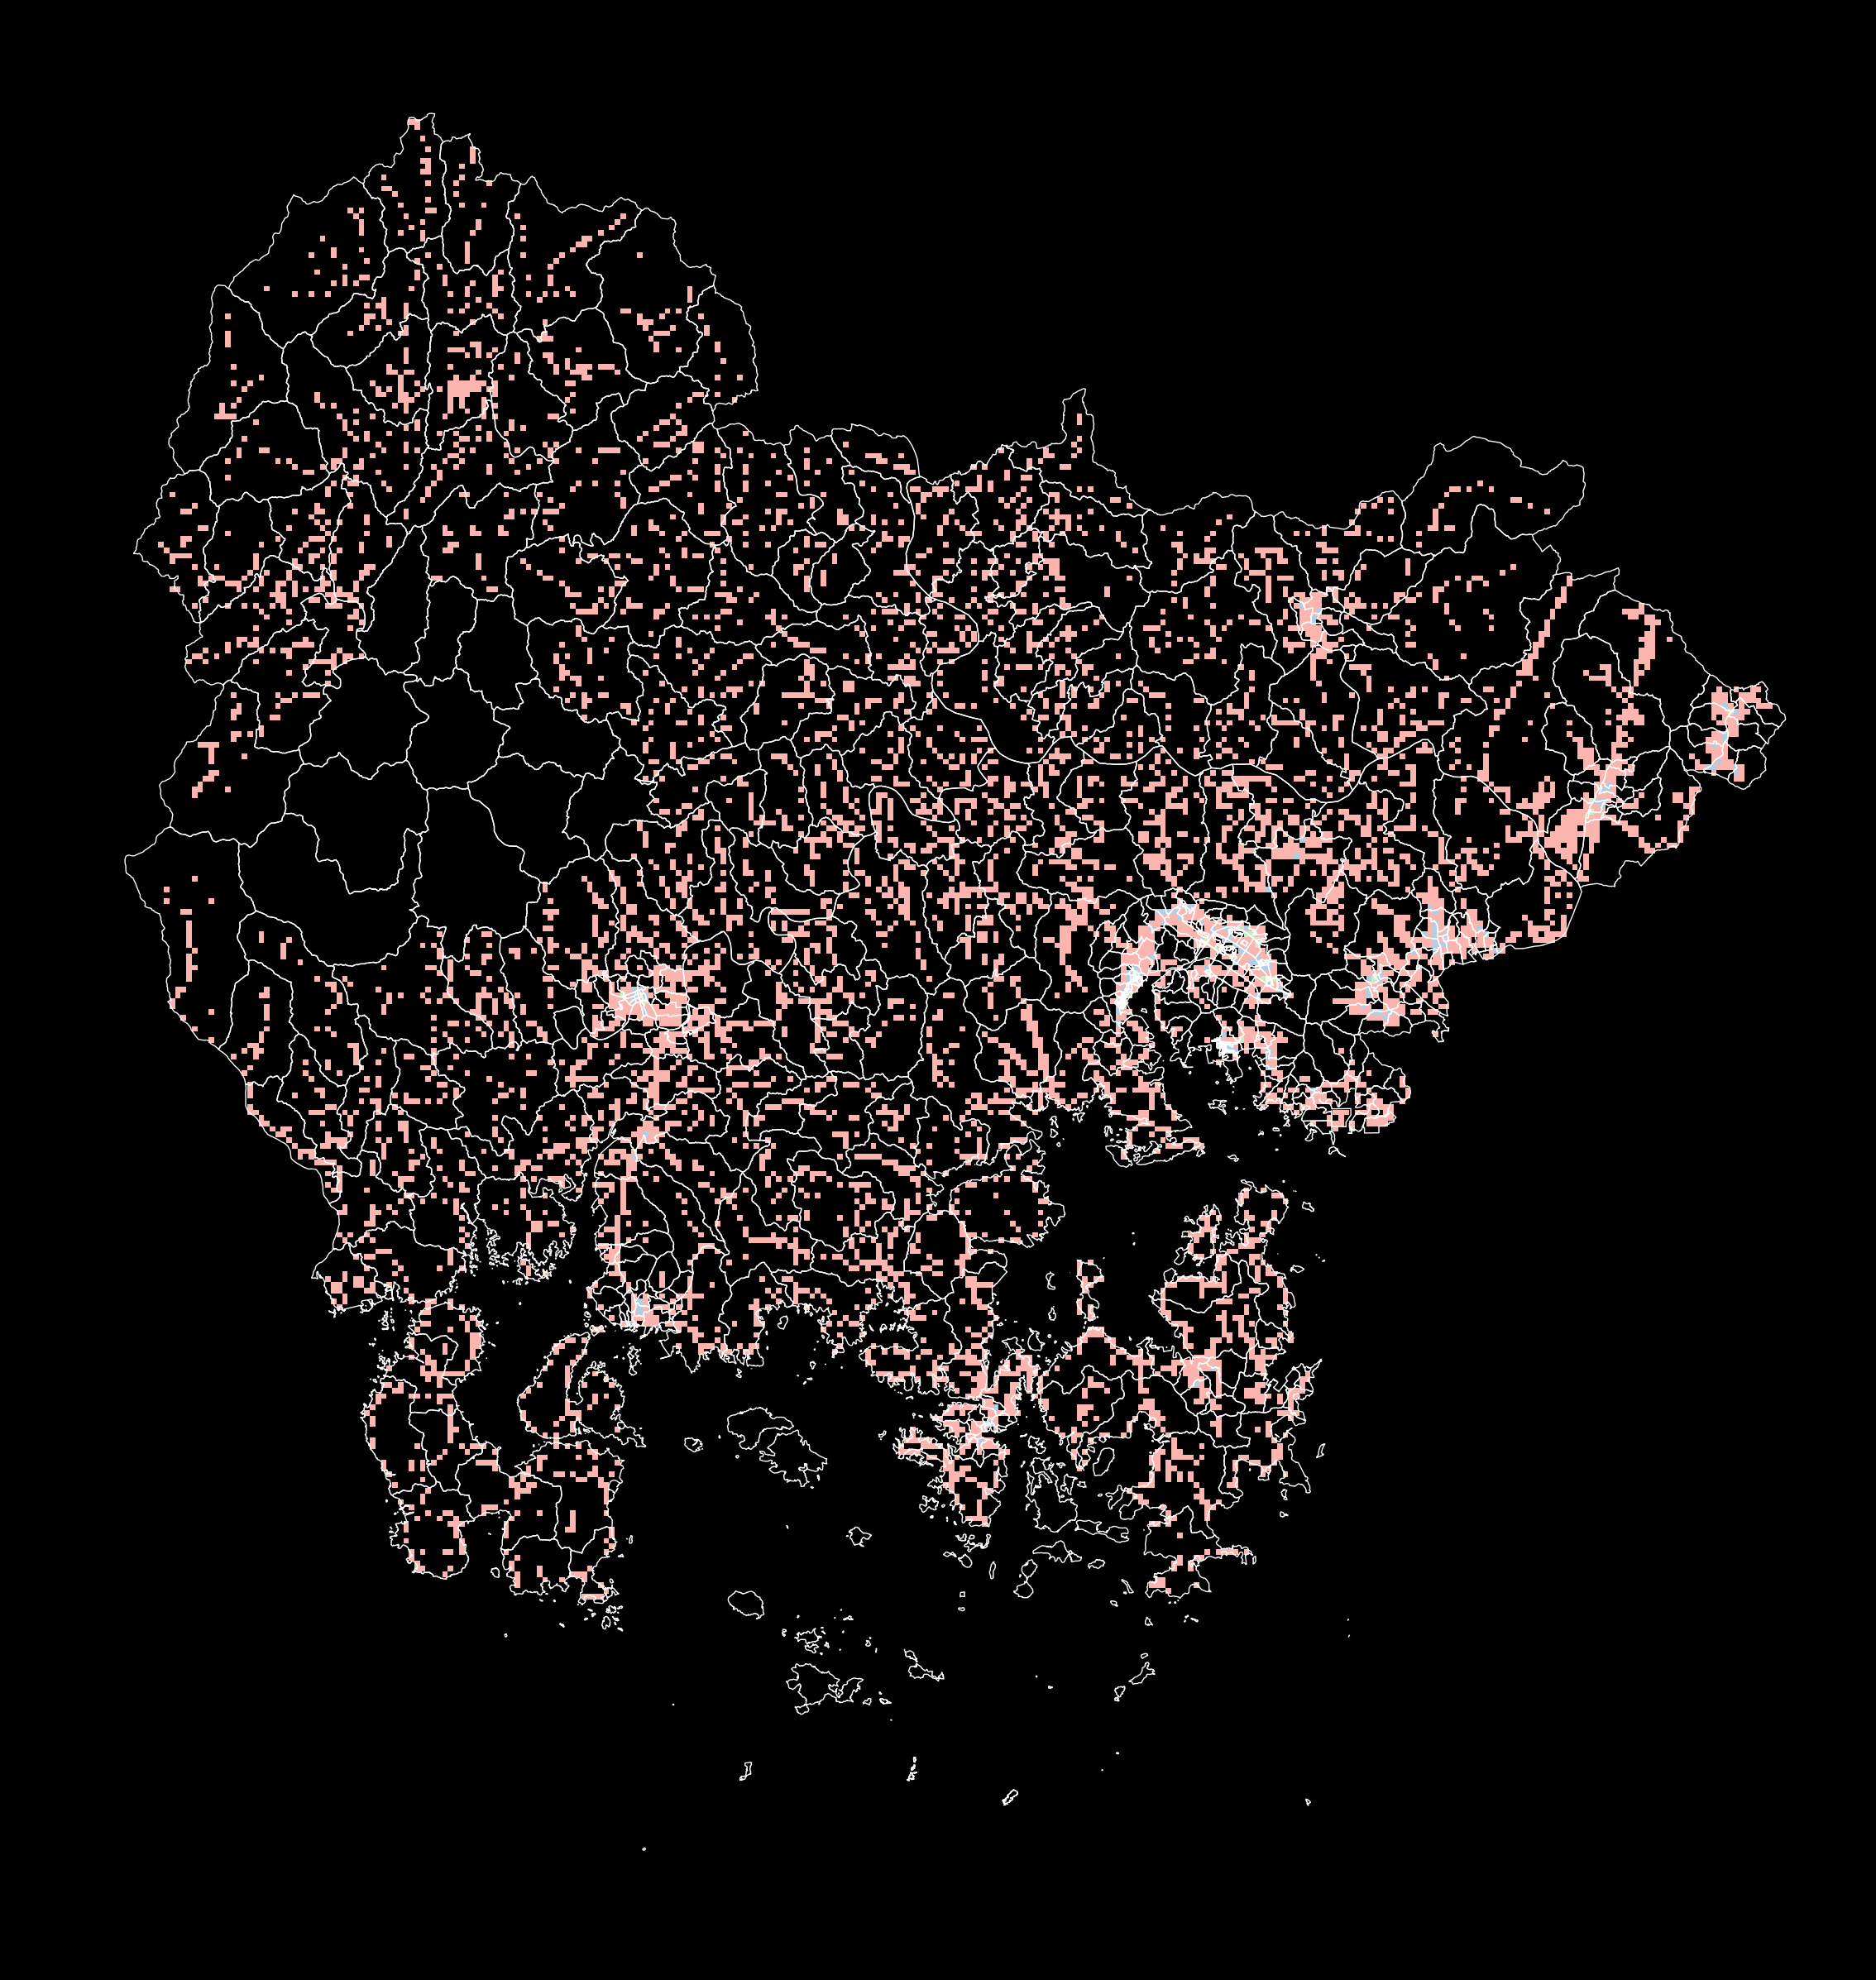

In [51]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
# grid.plot(column='value', ax=ax, legend=True, cmap='black')

# 검은색 배경 설정
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 격자와 버스 정류장 시각화
grid.plot(column="value", ax=ax, cmap="Pastel1")
emd.boundary.plot(ax=ax, linewidth=1, color='white')
plt.title('Gyeongsangnam-do Grid Map with Values')
plt.show()

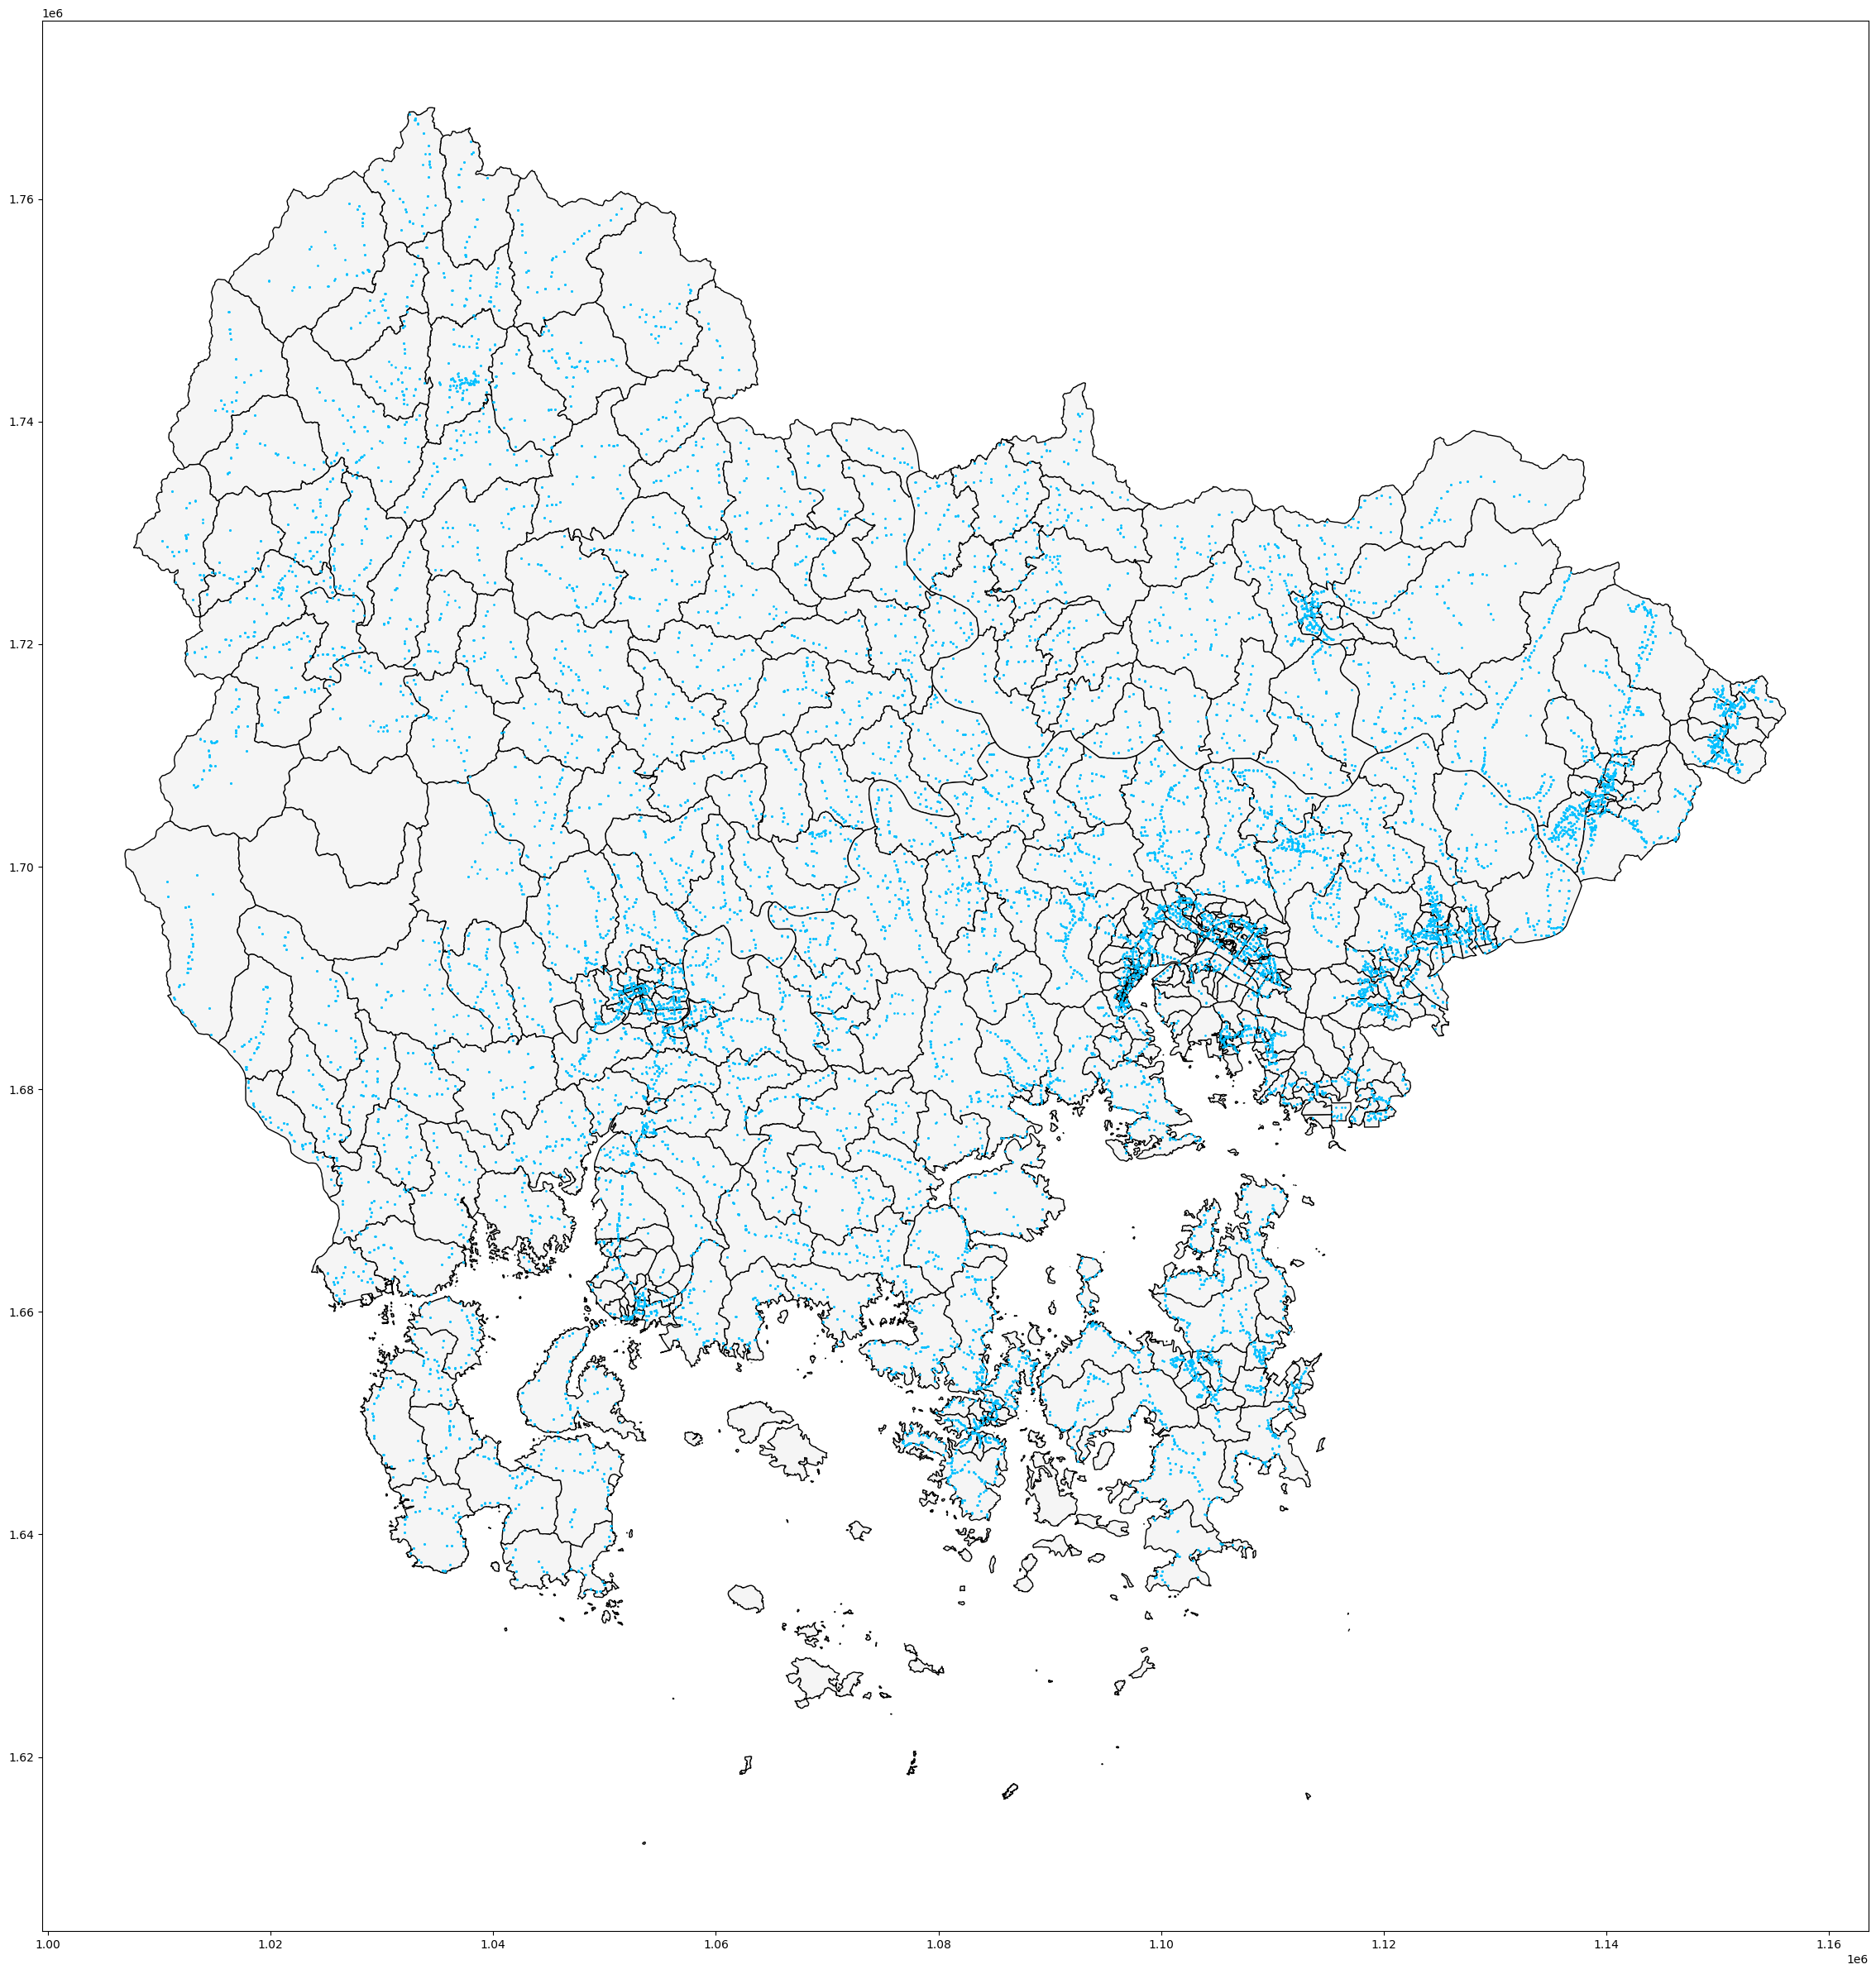

In [9]:
## 읍면동 틀 그리기
ax = emd.plot(
    figsize = (30, 30), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

## 버스 정류장 위치 확인
busstop_within_emd.plot(
    ax = ax, 
    color = "deepskyblue", 
    markersize = 1
)

plt.show()